<a href="https://colab.research.google.com/github/FerdousALgorbeye/DataBase/blob/main/smartcity_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[MQTT] Sending: {'air_quality': 92, 'noise': 71}
[MQTT] Sending: {'air_quality': 130, 'noise': 68}
[MQTT] Sending: {'air_quality': 57, 'noise': 48}
[MQTT] Sending: {'air_quality': 139, 'noise': 44}
[MQTT] Sending: {'air_quality': 126, 'noise': 53}
[MQTT] Sending: {'air_quality': 77, 'noise': 54}
[MQTT] Sending: {'air_quality': 108, 'noise': 66}
[MQTT] Sending: {'air_quality': 89, 'noise': 62}
[MQTT] Sending: {'air_quality': 51, 'noise': 86}
[MQTT] Sending: {'air_quality': 73, 'noise': 53}
[MQTT] Sending: {'air_quality': 145, 'noise': 51}
[MQTT] Sending: {'air_quality': 149, 'noise': 58}


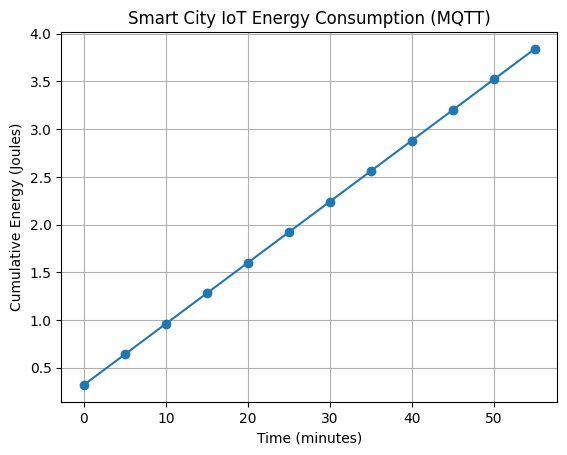

[MQTT] Sending: [(59, 42), (120, 61), (56, 46)]
[MQTT] Sending: [(99, 64), (72, 43), (124, 85)]
[MQTT] Sending: [(142, 63), (68, 63), (93, 52)]
[MQTT] Sending: [(96, 49), (135, 73), (87, 49)]


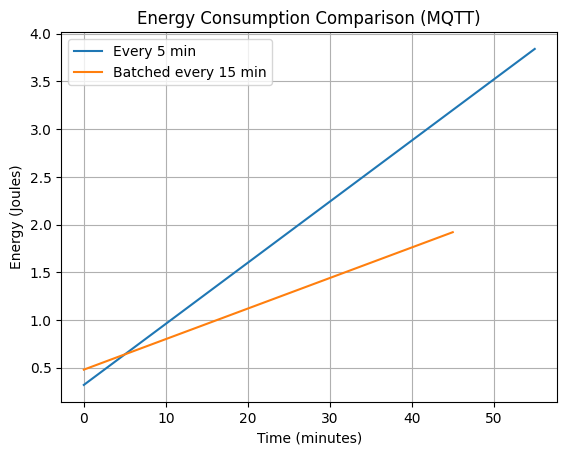

In [2]:
import random
import time
import matplotlib.pyplot as plt

sensing_power = 0.4
comm_power = 0.8
sensing_time = 0.2
comm_time = 0.3

def calculate_energy(power, duration):
    return power * duration

def read_sensors():
    air_quality = random.randint(50, 150)
    noise_level = random.randint(30, 90)
    return air_quality, noise_level

def mqtt_transmit(data):
    print(f"[MQTT] Sending: {data}")
    time.sleep(comm_time)

duration_minutes = 60
interval = 5

times = []
energies = []
total_energy = 0

for t in range(0, duration_minutes, interval):
    air, noise = read_sensors()

    sensing_energy = calculate_energy(sensing_power, sensing_time)
    comm_energy = calculate_energy(comm_power, comm_time)
    total_energy += sensing_energy + comm_energy

    mqtt_transmit({'air_quality': air, 'noise': noise})

    times.append(t)
    energies.append(total_energy)

plt.plot(times, energies, marker='o')
plt.title("Smart City IoT Energy Consumption (MQTT)")
plt.xlabel("Time (minutes)")
plt.ylabel("Cumulative Energy (Joules)")
plt.grid(True)
plt.show()
# إعادة تعيين الطاقة
total_energy = 0
times_batched = []
energies_batched = []

batch_interval = 15

for t in range(0, duration_minutes, batch_interval):
    batch_data = []
    for i in range(3):
        air, noise = read_sensors()
        total_energy += calculate_energy(sensing_power, sensing_time)
        batch_data.append((air, noise))

    mqtt_transmit(batch_data)
    total_energy += calculate_energy(comm_power, comm_time)

    times_batched.append(t)
    energies_batched.append(total_energy)

plt.plot(times, energies, label="Every 5 min")
plt.plot(times_batched, energies_batched, label="Batched every 15 min")
plt.title("Energy Consumption Comparison (MQTT)")
plt.xlabel("Time (minutes)")
plt.ylabel("Energy (Joules)")
plt.legend()
plt.grid(True)
plt.show()
